In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
results_openml = pd.read_csv('../mementoML_results/results.csv')
df_openml = results_openml.copy()
df_openml.columns = ['target', 'set_index', 'AUC']
openml_names = {37: 'diabetes', 44: 'spambase', 1043: 'ada_agnostic', 1046: 'mozilla4', 1049: 'pc4', 1050: 'pc3',
            1063: 'kc2', 1067: 'kc1', 1068: 'pc1', 1120: 'MagicTelescope', 1462: 'banknote-authentication',
            1464: 'blood-transfusion', 1467: 'climate-model', 1471: 'eeg-eye-state',
            1479: 'hill-valley', 1485: 'madelon', 1487: 'ozone-level-8hr', 1489: 'phoneme', 1494: 'qsar-biodeg',
            1504: 'steel-plates-fault', 1510: 'wdbc', 1570: 'wilt'}
df_openml.loc[:, 'target'] = df_openml.loc[:, 'target'].map(openml_names)
df_openml

,target,set_index,AUC
0,diabetes,0,0.768046
1,diabetes,1,0.830233
2,diabetes,2,0.798156
3,diabetes,3,0.813763
4,diabetes,4,0.763103
...,...,...,...
21973,wilt,994,0.828950
21974,wilt,995,0.966634
21975,wilt,996,0.927657
21976,wilt,997,0.978009


In [3]:
results_mimic_1 = pd.read_csv('../2_metaMIMIC_experiment_1/results.csv')
df_mimic_1 = results_mimic_1.groupby(['set_index', 'target']).agg({'AUC': 'mean'}).reset_index().copy()
df_mimic_1 = df_mimic_1.loc[df_mimic_1['set_index']!=999]
mimic_names = {'hypotension_diagnosed': 'hypotension', 'anemia_diagnosed': 'anemia',
               'purpura_diagnosed': 'purpura', 'respiratory_diagnosed': 'respiratory diseases',
               'hypertensive_diagnosed': 'hypertension', 'lipoid_diagnosed': 'lipoid disorders',
               'diabetes_diagnosed': 'diabetes', 'overweight_diagnosed': 'obesity',
               'alcohol_diagnosed': 'alcohol dependence', 'atrial_diagnosed': 'atrial fibrillation',
               'ischematic_diagnosed': 'ischematic diseases', 'heart_diagnosed': 'heart failure'}
df_mimic_1.loc[:, 'target'] = df_mimic_1.loc[:, 'target'].map(mimic_names)
df_mimic_1

,set_index,target,AUC
0,0,alcohol dependence,0.856719
1,0,anemia,0.809860
2,0,atrial fibrillation,0.896220
3,0,diabetes,0.882983
4,0,heart failure,0.838546
...,...,...,...
11983,998,ischematic diseases,0.500009
11984,998,lipoid disorders,0.499375
11985,998,obesity,0.499451
11986,998,purpura,0.669327


In [4]:
results_mimic_2 = pd.read_csv('../3_metaMIMIC_experiment_2/results.csv')
df_mimic_2 = results_mimic_2.groupby(['set_index', 'target', 'half']).agg({'AUC': 'mean'}).reset_index().copy()
df_mimic_2 = df_mimic_2.loc[df_mimic_2['set_index']!=999]
mimic_names = {'hypotension_diagnosed': 'hypotension', 'anemia_diagnosed': 'anemia',
               'purpura_diagnosed': 'purpura', 'respiratory_diagnosed': 'respiratory diseases',
               'hypertensive_diagnosed': 'hypertension', 'lipoid_diagnosed': 'lipoid disorders',
               'diabetes_diagnosed': 'diabetes', 'overweight_diagnosed': 'obesity',
               'alcohol_diagnosed': 'alcohol dependence', 'atrial_diagnosed': 'atrial fibrillation',
               'ischematic_diagnosed': 'ischematic diseases', 'heart_diagnosed': 'heart failure'}
df_mimic_2.loc[:, 'target'] = df_mimic_2.loc[:, 'target'].map(mimic_names)
df_mimic_2

,set_index,target,half,AUC
0,0,alcohol dependence,1,0.853606
1,0,alcohol dependence,2,0.848731
2,0,anemia,1,0.809902
3,0,anemia,2,0.797775
4,0,atrial fibrillation,1,0.886608
...,...,...,...,...
23971,998,obesity,2,0.499758
23972,998,purpura,1,0.502272
23973,998,purpura,2,0.600437
23974,998,respiratory diseases,1,0.499754


mean: 0.165 ± 0.469


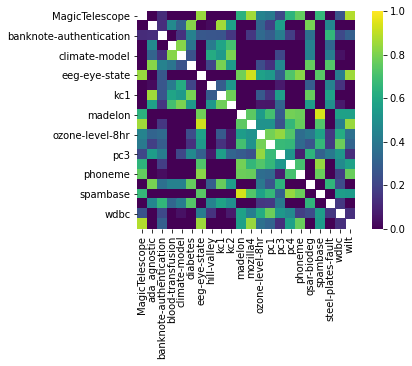

In [5]:
targets_openml = np.unique(df_openml['target'])
n_openml = len(targets_openml)
spearman_openml = pd.DataFrame(index=targets_openml, columns=targets_openml, dtype=float)
for i in range(n_openml):
    for j in range(n_openml):
        if i==j:
            spearman_openml.iloc[i, j] = None
            continue
        auc_1 = df_openml.loc[df_openml['target']==targets_openml[i], 'AUC']
        auc_2 = df_openml.loc[df_openml['target']==targets_openml[j], 'AUC']
        spearman_openml.iloc[i, j] = stats.spearmanr(auc_1, auc_2)[0]
        
sns.heatmap(spearman_openml, cmap='viridis', vmin=0, vmax=1, square=True)
print(f'mean: {np.nanmean(spearman_openml.values.reshape(-1)):.3f} ± {np.nanstd(spearman_openml.values.reshape(-1)):.3f}')

mean: 0.885 ± 0.072


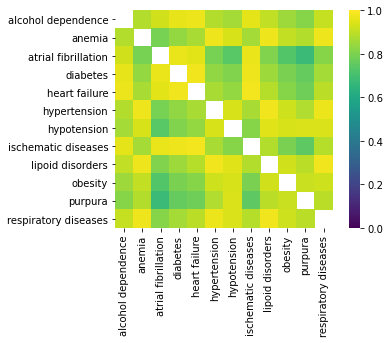

In [6]:
targets_mimic_1 = np.unique(df_mimic_1['target'])
n_mimic_1 = len(targets_mimic_1)
spearman_mimic_1 = pd.DataFrame(index=targets_mimic_1, columns=targets_mimic_1, dtype=float)
for i in range(n_mimic_1):
    for j in range(n_mimic_1):
        if i==j:
            spearman_mimic_1.iloc[i, j] = None
            continue
        auc_1 = df_mimic_1.loc[df_mimic_1['target']==targets_mimic_1[i], 'AUC']
        auc_2 = df_mimic_1.loc[df_mimic_1['target']==targets_mimic_1[j], 'AUC']
        spearman_mimic_1.iloc[i, j] = stats.spearmanr(auc_1, auc_2)[0]
        
sns.heatmap(spearman_mimic_1, cmap='viridis', vmin=0, vmax=1, square=True)
print(f'mean: {np.nanmean(spearman_mimic_1.values.reshape(-1)):.3f} ± {np.nanstd(spearman_mimic_1.values.reshape(-1)):.3f}')

mean: 0.849 ± 0.078


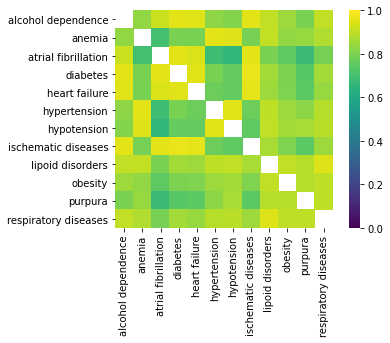

In [7]:
targets_mimic_2 = np.unique(df_mimic_2['target'])
n_mimic_2 = len(targets_mimic_2)
spearman_mimic_2 = pd.DataFrame(index=targets_mimic_2, columns=targets_mimic_2, dtype=float)
for i in range(n_mimic_2):
    for j in range(n_mimic_2):
        if i==j:
            spearman_mimic_2.iloc[i, j] = None
            continue
        auc_1 = df_mimic_2.loc[df_mimic_2['target']==targets_mimic_2[i], 'AUC']
        auc_2 = df_mimic_2.loc[df_mimic_2['target']==targets_mimic_2[j], 'AUC']
        spearman_mimic_2.iloc[i, j] = stats.spearmanr(auc_1, auc_2)[0]

sns.heatmap(spearman_mimic_2, cmap='viridis', vmin=0, vmax=1, square=True)
print(f'mean: {np.nanmean(spearman_mimic_2.values.reshape(-1)):.3f} ± {np.nanstd(spearman_mimic_2.values.reshape(-1)):.3f}')